In [1]:
import cv2
import torch
import numpy as np

cap = cv2.VideoCapture('/home/louis/Documents/gatech/Summer2023/Multimodal-Deep-Regression/data/video_packs/video_pack_1000/7117343959055191302.mp4')

frames = []
frame_count = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (72, 128))  
    frame = frame.transpose((2, 0, 1)) 
    frames.append(frame)
    frame_count += 1
    if frame_count >= 5:
        break

cap.release()

#frames = [np.array(frame)/255 for frame in frames]  # Normalizing data
frames = np.stack(frames)  
frames = np.transpose(frames, (1, 0, 2, 3))  
input_data = input_data.unsqueeze(0) 
input_data.size()

torch.Size([1, 3, 5, 128, 72])

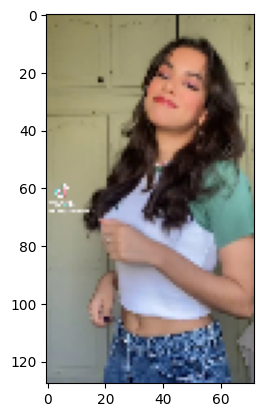

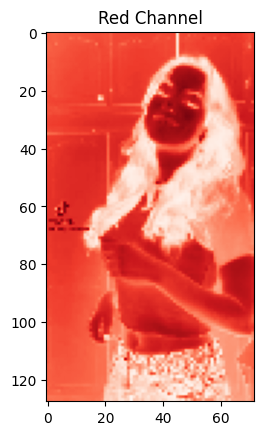

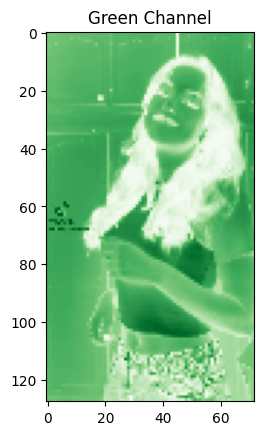

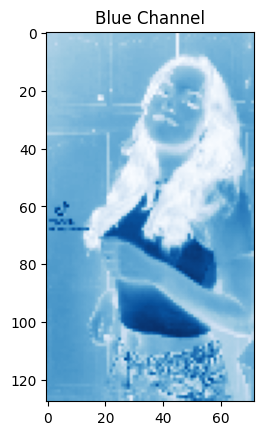

In [2]:
import matplotlib.pyplot as plt

# select the video & frame
video = 1
frame = 3

# select a frame
image_tensor = input_data[0] [:,frame,:,:]
numpy_image = image_tensor.detach().numpy()

# imshow (Height, Width, Channels)
numpy_image = numpy_image.transpose((1, 2, 0))

# normalize to 0,1
numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

plt.imshow(numpy_image)
plt.show()

# Red channel
plt.imshow(numpy_image[:,:,0], cmap='Reds')
plt.title("Red Channel")
plt.show()

# Green channel
plt.imshow(numpy_image[:,:,1], cmap='Greens')
plt.title("Green Channel")
plt.show()

# Blue channel
plt.imshow(numpy_image[:,:,2], cmap='Blues')
plt.title("Blue Channel")
plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import os
import random
import time

# Create Batches with DataLoaders
batch_size = 1
train_loader = list(zip(input_data, input_data)) #TensorDataset(x_train, y_train)
train_loader = DataLoader(train_loader, batch_size=batch_size, shuffle=True)

In [4]:
# This need to same as the main & preprocess
frames_to_skip=200 # how many frame to skip, reduce depth
shrink=8 # shrink H x W, the higher the smaller scale
normalize=False # normalize the pixel to 0 to 1

In [5]:
H = 1024//shrink
W = 576//shrink
H,W

(128, 72)

In [6]:
import torch
import matplotlib.pyplot as plt

def check():
    outputs = model(input_data.to(torch.float32))

    # select a frame
    image_tensor = outputs.squeeze()[:,3,:,:]
    numpy_image = image_tensor.detach().numpy()

    # imshow (Height, Width, Channels)
    numpy_image = numpy_image.transpose((1, 2, 0))

    # normalize to 0,1
    numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

    plt.imshow(numpy_image)
    plt.show()

Total parameters: 262,883
First epoch took 0.0 minutes.
Epoch 1/100, Train_Loss: 2881.42, Avg: 2881.42
Epoch 2/100, Train_Loss: 2855.19, Avg: 2855.19
Epoch 3/100, Train_Loss: 2810.48, Avg: 2810.48
Epoch 4/100, Train_Loss: 2708.53, Avg: 2708.53
Epoch 5/100, Train_Loss: 2481.31, Avg: 2481.31
Epoch 6/100, Train_Loss: 2212.19, Avg: 2212.19
Epoch 7/100, Train_Loss: 2111.28, Avg: 2111.28
Epoch 8/100, Train_Loss: 1843.01, Avg: 1843.01
Epoch 9/100, Train_Loss: 1626.89, Avg: 1626.89
Epoch 10/100, Train_Loss: 1537.20, Avg: 1537.20


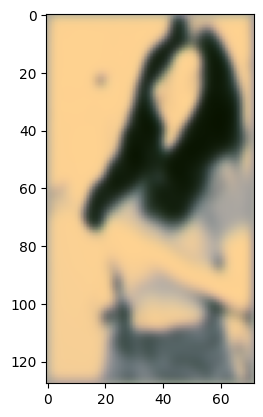

Epoch 11/100, Train_Loss: 1483.03, Avg: 1483.03
Epoch 12/100, Train_Loss: 1479.85, Avg: 1479.85
Epoch 13/100, Train_Loss: 1423.39, Avg: 1423.39
Epoch 14/100, Train_Loss: 1455.77, Avg: 1455.77
Epoch 15/100, Train_Loss: 1356.92, Avg: 1356.92
Epoch 16/100, Train_Loss: 1334.76, Avg: 1334.76
Epoch 17/100, Train_Loss: 1294.80, Avg: 1294.80
Epoch 18/100, Train_Loss: 1336.22, Avg: 1336.22
Epoch 19/100, Train_Loss: 1288.31, Avg: 1288.31
Epoch 20/100, Train_Loss: 1250.19, Avg: 1250.19


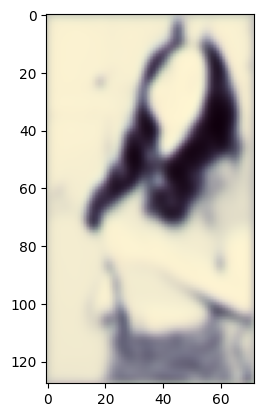

Epoch 21/100, Train_Loss: 1191.71, Avg: 1191.71
Epoch 22/100, Train_Loss: 1219.69, Avg: 1219.69
Epoch 23/100, Train_Loss: 1210.85, Avg: 1210.85
Epoch 24/100, Train_Loss: 1202.98, Avg: 1202.98
Epoch 25/100, Train_Loss: 1077.57, Avg: 1077.57
Epoch 26/100, Train_Loss: 1100.51, Avg: 1100.51
Epoch 27/100, Train_Loss: 1065.67, Avg: 1065.67
Epoch 28/100, Train_Loss: 1080.35, Avg: 1080.35
Epoch 29/100, Train_Loss: 972.24, Avg: 972.24
Epoch 30/100, Train_Loss: 1004.44, Avg: 1004.44


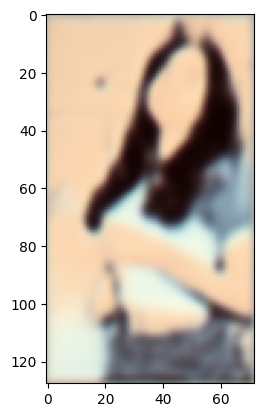

Epoch 31/100, Train_Loss: 916.92, Avg: 916.92
Epoch 32/100, Train_Loss: 895.90, Avg: 895.90
Epoch 33/100, Train_Loss: 868.29, Avg: 868.29
Epoch 34/100, Train_Loss: 881.75, Avg: 881.75
Epoch 35/100, Train_Loss: 812.62, Avg: 812.62
Epoch 36/100, Train_Loss: 819.68, Avg: 819.68
Epoch 37/100, Train_Loss: 863.32, Avg: 863.32
Epoch 38/100, Train_Loss: 800.37, Avg: 800.37
Epoch 39/100, Train_Loss: 819.95, Avg: 819.95
Epoch 40/100, Train_Loss: 772.94, Avg: 772.94


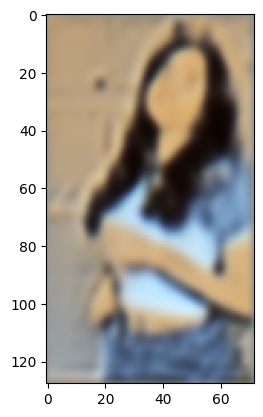

Epoch 41/100, Train_Loss: 742.05, Avg: 742.05
Epoch 42/100, Train_Loss: 726.61, Avg: 726.61
Epoch 43/100, Train_Loss: 741.70, Avg: 741.70
Epoch 44/100, Train_Loss: 686.35, Avg: 686.35
Epoch 45/100, Train_Loss: 676.33, Avg: 676.33
Epoch 46/100, Train_Loss: 696.06, Avg: 696.06
Epoch 47/100, Train_Loss: 642.49, Avg: 642.49
Epoch 48/100, Train_Loss: 643.73, Avg: 643.73
Epoch 49/100, Train_Loss: 628.49, Avg: 628.49
Epoch 50/100, Train_Loss: 631.54, Avg: 631.54


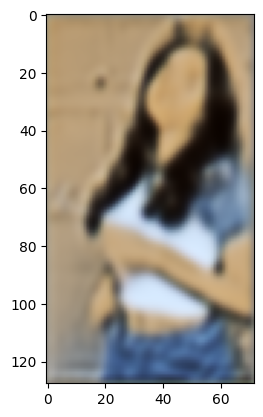

Epoch 51/100, Train_Loss: 619.08, Avg: 619.08
Epoch 52/100, Train_Loss: 596.50, Avg: 596.50
Epoch 53/100, Train_Loss: 603.12, Avg: 603.12
Epoch 54/100, Train_Loss: 606.05, Avg: 606.05
Epoch 55/100, Train_Loss: 611.32, Avg: 611.32
Epoch 56/100, Train_Loss: 587.36, Avg: 587.36
Epoch 57/100, Train_Loss: 570.20, Avg: 570.20
Epoch 58/100, Train_Loss: 592.16, Avg: 592.16
Epoch 59/100, Train_Loss: 589.62, Avg: 589.62
Epoch 60/100, Train_Loss: 553.70, Avg: 553.70


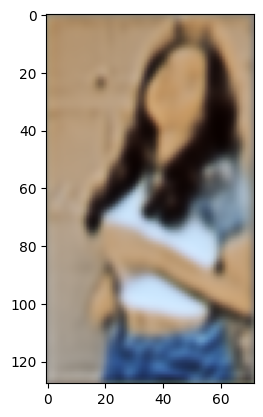

Epoch 61/100, Train_Loss: 550.98, Avg: 550.98
Epoch 62/100, Train_Loss: 556.99, Avg: 556.99
Epoch 63/100, Train_Loss: 542.02, Avg: 542.02
Epoch 64/100, Train_Loss: 533.46, Avg: 533.46
Epoch 65/100, Train_Loss: 534.90, Avg: 534.90
Epoch 66/100, Train_Loss: 523.95, Avg: 523.95
Epoch 67/100, Train_Loss: 528.00, Avg: 528.00
Epoch 68/100, Train_Loss: 527.83, Avg: 527.83
Epoch 69/100, Train_Loss: 512.80, Avg: 512.80
Epoch 70/100, Train_Loss: 525.76, Avg: 525.76


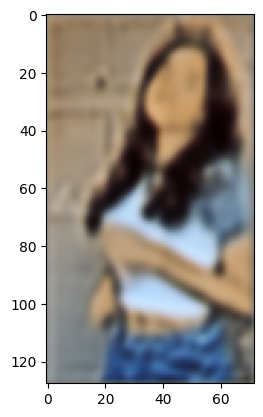

Epoch 71/100, Train_Loss: 555.42, Avg: 555.42
Epoch 72/100, Train_Loss: 643.94, Avg: 643.94
Epoch 73/100, Train_Loss: 537.85, Avg: 537.85
Epoch 74/100, Train_Loss: 602.66, Avg: 602.66
Epoch 75/100, Train_Loss: 562.07, Avg: 562.07
Epoch 76/100, Train_Loss: 565.43, Avg: 565.43
Epoch 77/100, Train_Loss: 539.11, Avg: 539.11
Epoch 78/100, Train_Loss: 556.26, Avg: 556.26
Epoch 79/100, Train_Loss: 513.68, Avg: 513.68
Epoch 80/100, Train_Loss: 562.04, Avg: 562.04


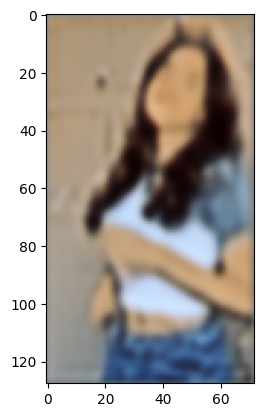

Epoch 81/100, Train_Loss: 504.71, Avg: 504.71
Epoch 82/100, Train_Loss: 546.42, Avg: 546.42
Epoch 83/100, Train_Loss: 509.76, Avg: 509.76
Epoch 84/100, Train_Loss: 511.79, Avg: 511.79
Epoch 85/100, Train_Loss: 496.70, Avg: 496.70
Epoch 86/100, Train_Loss: 503.93, Avg: 503.93
Epoch 87/100, Train_Loss: 495.14, Avg: 495.14
Epoch 88/100, Train_Loss: 480.30, Avg: 480.30
Epoch 89/100, Train_Loss: 481.88, Avg: 481.88
Epoch 90/100, Train_Loss: 480.33, Avg: 480.33


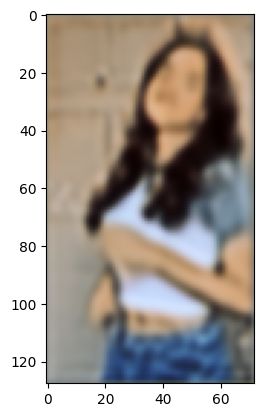

Epoch 91/100, Train_Loss: 466.79, Avg: 466.79
Epoch 92/100, Train_Loss: 471.34, Avg: 471.34
Epoch 93/100, Train_Loss: 456.54, Avg: 456.54
Epoch 94/100, Train_Loss: 459.99, Avg: 459.99
Epoch 95/100, Train_Loss: 460.62, Avg: 460.62
Epoch 96/100, Train_Loss: 450.50, Avg: 450.50
Epoch 97/100, Train_Loss: 444.08, Avg: 444.08
Epoch 98/100, Train_Loss: 443.38, Avg: 443.38
Epoch 99/100, Train_Loss: 440.63, Avg: 440.63
Epoch 100/100, Train_Loss: 432.56, Avg: 432.56


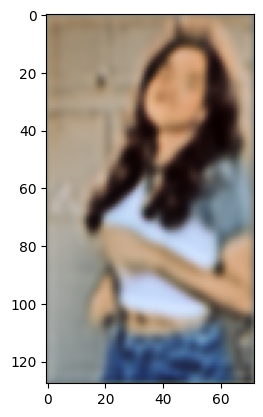

In [7]:
import sys
sys.path.append("..")
from models import ConvLSTMAutoencoder
from util.utilities import train, evaluate, get_device

model = ConvLSTMAutoencoder(hidden_dim=32, shrink=shrink, normalize=normalize)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")

EPOCHS = 100

train_losses = []
val_losses = []
start_time = time.time()

for epoch in range(EPOCHS):
    train_loss, avg_train_loss = train(model, train_loader, criterion, optimizer)
    #val_loss, avg_val_loss = evaluate(model, val_loader, criterion)
    
    # record the losses
    train_losses.append(avg_train_loss)
    #val_losses.append(avg_val_loss)

    # print every num times epoch only
    num = 1
    if ((epoch+1) % num == 0) or epoch == 0:
        if epoch == 0:
            time_took = (time.time() - start_time) / 60
            print(f'First epoch took {time_took:.1f} minutes.')
        print(f'Epoch {epoch+1}/{EPOCHS}, Train_Loss: {train_loss:.2f}, Avg: {avg_train_loss:.2f}')
    if ((epoch+1) % 10 == 0):
        check()

First epoch took 1.3 minutes.
Epoch 1/100, Train_Loss: 431.06, Avg: 431.06
Epoch 2/100, Train_Loss: 426.88, Avg: 426.88
Epoch 3/100, Train_Loss: 426.59, Avg: 426.59
Epoch 4/100, Train_Loss: 422.83, Avg: 422.83
Epoch 5/100, Train_Loss: 422.27, Avg: 422.27
Epoch 6/100, Train_Loss: 418.99, Avg: 418.99
Epoch 7/100, Train_Loss: 410.62, Avg: 410.62
Epoch 8/100, Train_Loss: 409.47, Avg: 409.47
Epoch 9/100, Train_Loss: 404.71, Avg: 404.71
Epoch 10/100, Train_Loss: 401.20, Avg: 401.20


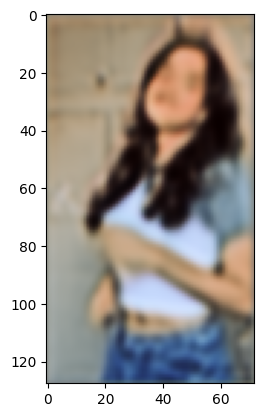

Epoch 11/100, Train_Loss: 398.21, Avg: 398.21
Epoch 12/100, Train_Loss: 396.33, Avg: 396.33
Epoch 13/100, Train_Loss: 393.55, Avg: 393.55
Epoch 14/100, Train_Loss: 397.41, Avg: 397.41
Epoch 15/100, Train_Loss: 429.07, Avg: 429.07
Epoch 16/100, Train_Loss: 530.45, Avg: 530.45
Epoch 17/100, Train_Loss: 627.81, Avg: 627.81
Epoch 18/100, Train_Loss: 455.25, Avg: 455.25
Epoch 19/100, Train_Loss: 521.83, Avg: 521.83
Epoch 20/100, Train_Loss: 526.10, Avg: 526.10


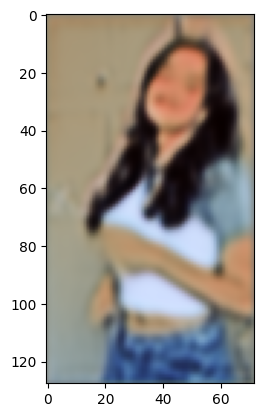

Epoch 21/100, Train_Loss: 459.98, Avg: 459.98
Epoch 22/100, Train_Loss: 472.30, Avg: 472.30
Epoch 23/100, Train_Loss: 492.90, Avg: 492.90
Epoch 24/100, Train_Loss: 444.65, Avg: 444.65
Epoch 25/100, Train_Loss: 434.92, Avg: 434.92
Epoch 26/100, Train_Loss: 456.94, Avg: 456.94
Epoch 27/100, Train_Loss: 423.75, Avg: 423.75
Epoch 28/100, Train_Loss: 420.67, Avg: 420.67
Epoch 29/100, Train_Loss: 432.48, Avg: 432.48
Epoch 30/100, Train_Loss: 404.79, Avg: 404.79


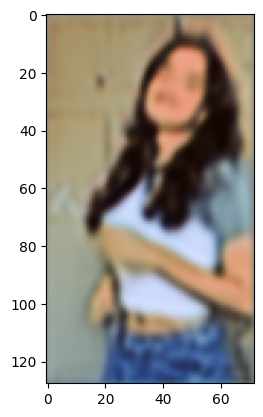

Epoch 31/100, Train_Loss: 402.85, Avg: 402.85
Epoch 32/100, Train_Loss: 406.52, Avg: 406.52
Epoch 33/100, Train_Loss: 394.87, Avg: 394.87
Epoch 34/100, Train_Loss: 388.31, Avg: 388.31
Epoch 35/100, Train_Loss: 388.19, Avg: 388.19
Epoch 36/100, Train_Loss: 384.42, Avg: 384.42
Epoch 37/100, Train_Loss: 375.16, Avg: 375.16
Epoch 38/100, Train_Loss: 379.41, Avg: 379.41
Epoch 39/100, Train_Loss: 371.65, Avg: 371.65
Epoch 40/100, Train_Loss: 371.13, Avg: 371.13


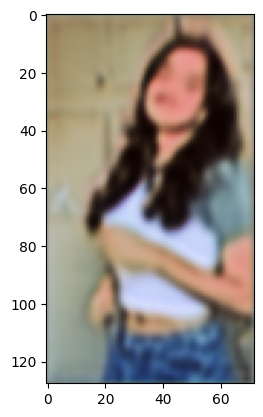

Epoch 41/100, Train_Loss: 366.88, Avg: 366.88
Epoch 42/100, Train_Loss: 363.57, Avg: 363.57
Epoch 43/100, Train_Loss: 361.41, Avg: 361.41
Epoch 44/100, Train_Loss: 360.72, Avg: 360.72
Epoch 45/100, Train_Loss: 357.16, Avg: 357.16
Epoch 46/100, Train_Loss: 354.50, Avg: 354.50
Epoch 47/100, Train_Loss: 353.12, Avg: 353.12
Epoch 48/100, Train_Loss: 348.18, Avg: 348.18
Epoch 49/100, Train_Loss: 347.25, Avg: 347.25
Epoch 50/100, Train_Loss: 345.89, Avg: 345.89


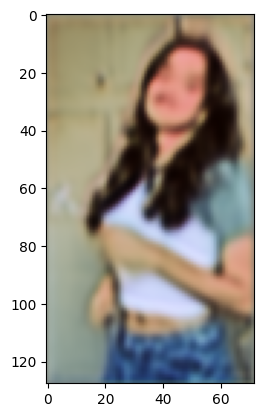

Epoch 51/100, Train_Loss: 343.11, Avg: 343.11
Epoch 52/100, Train_Loss: 342.87, Avg: 342.87
Epoch 53/100, Train_Loss: 339.44, Avg: 339.44
Epoch 54/100, Train_Loss: 338.11, Avg: 338.11
Epoch 55/100, Train_Loss: 336.39, Avg: 336.39
Epoch 56/100, Train_Loss: 334.02, Avg: 334.02
Epoch 57/100, Train_Loss: 334.03, Avg: 334.03
Epoch 58/100, Train_Loss: 331.81, Avg: 331.81
Epoch 59/100, Train_Loss: 329.94, Avg: 329.94
Epoch 60/100, Train_Loss: 329.12, Avg: 329.12


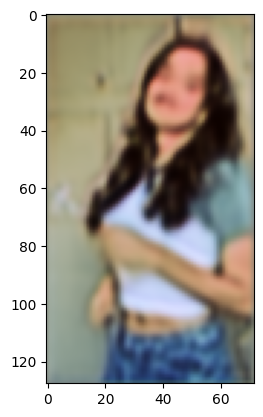

Epoch 61/100, Train_Loss: 327.78, Avg: 327.78
Epoch 62/100, Train_Loss: 326.61, Avg: 326.61
Epoch 63/100, Train_Loss: 324.48, Avg: 324.48
Epoch 64/100, Train_Loss: 323.25, Avg: 323.25
Epoch 65/100, Train_Loss: 322.71, Avg: 322.71
Epoch 66/100, Train_Loss: 321.04, Avg: 321.04
Epoch 67/100, Train_Loss: 319.78, Avg: 319.78
Epoch 68/100, Train_Loss: 317.95, Avg: 317.95
Epoch 69/100, Train_Loss: 316.89, Avg: 316.89
Epoch 70/100, Train_Loss: 315.94, Avg: 315.94


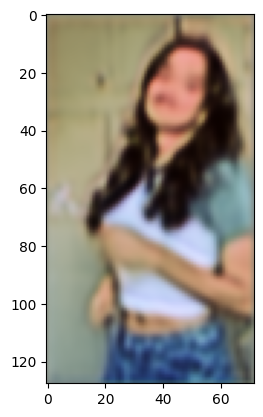

Epoch 71/100, Train_Loss: 314.84, Avg: 314.84
Epoch 72/100, Train_Loss: 314.08, Avg: 314.08
Epoch 73/100, Train_Loss: 312.68, Avg: 312.68
Epoch 74/100, Train_Loss: 311.56, Avg: 311.56
Epoch 75/100, Train_Loss: 310.24, Avg: 310.24
Epoch 76/100, Train_Loss: 308.89, Avg: 308.89
Epoch 77/100, Train_Loss: 307.59, Avg: 307.59
Epoch 78/100, Train_Loss: 306.11, Avg: 306.11
Epoch 79/100, Train_Loss: 304.98, Avg: 304.98
Epoch 80/100, Train_Loss: 303.71, Avg: 303.71


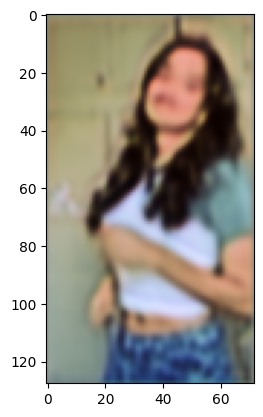

Epoch 81/100, Train_Loss: 302.70, Avg: 302.70
Epoch 82/100, Train_Loss: 301.58, Avg: 301.58
Epoch 83/100, Train_Loss: 300.76, Avg: 300.76
Epoch 84/100, Train_Loss: 300.44, Avg: 300.44
Epoch 85/100, Train_Loss: 301.94, Avg: 301.94
Epoch 86/100, Train_Loss: 308.42, Avg: 308.42
Epoch 87/100, Train_Loss: 328.49, Avg: 328.49
Epoch 88/100, Train_Loss: 347.59, Avg: 347.59
Epoch 89/100, Train_Loss: 334.49, Avg: 334.49
Epoch 90/100, Train_Loss: 304.51, Avg: 304.51


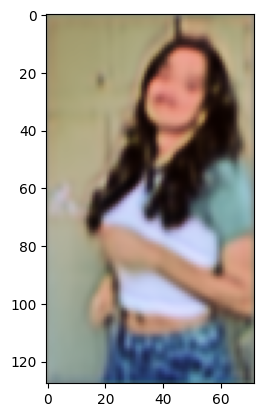

Epoch 91/100, Train_Loss: 332.28, Avg: 332.28
Epoch 92/100, Train_Loss: 306.59, Avg: 306.59
Epoch 93/100, Train_Loss: 313.35, Avg: 313.35
Epoch 94/100, Train_Loss: 310.01, Avg: 310.01
Epoch 95/100, Train_Loss: 300.98, Avg: 300.98
Epoch 96/100, Train_Loss: 310.10, Avg: 310.10
Epoch 97/100, Train_Loss: 294.10, Avg: 294.10
Epoch 98/100, Train_Loss: 304.64, Avg: 304.64
Epoch 99/100, Train_Loss: 297.08, Avg: 297.08
Epoch 100/100, Train_Loss: 291.19, Avg: 291.19


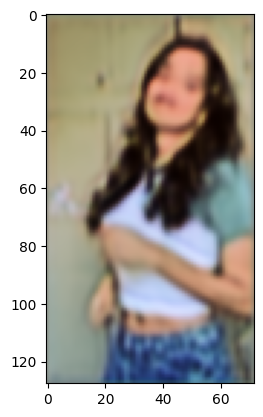

In [8]:
for epoch in range(EPOCHS):
    train_loss, avg_train_loss = train(model, train_loader, criterion, optimizer)
    #val_loss, avg_val_loss = evaluate(model, val_loader, criterion)
    
    # record the losses
    train_losses.append(avg_train_loss)
    #val_losses.append(avg_val_loss)

    # print every num times epoch only
    num = 1
    if ((epoch+1) % num == 0) or epoch == 0:
        if epoch == 0:
            time_took = (time.time() - start_time) / 60
            print(f'First epoch took {time_took:.1f} minutes.')
        print(f'Epoch {epoch+1}/{EPOCHS}, Train_Loss: {train_loss:.2f}, Avg: {avg_train_loss:.2f}')
    if ((epoch+1) % 10 == 0):
        check()